# STAN47 Lab 1: Programming and Mathematical Foundamentals
* Instructors: [Małgorzata Bogdan](https://portal.research.lu.se/sv/persons/malgorzata-bogdan), [Hanqing Wu](https://portal.research.lu.se/en/persons/hanqing-wu)

## Warm-up session

### Defining functions

Assuming that we have already had basic knowledge about introductory level of Python programming, let us take a look at the following function that aims to trim white space from a string and capitalize the first letter.

In [45]:
def process_string(str):
    t = str.strip()
    return t[0].upper()+t[1:]

This function can now be called quite easily.

In [46]:
str = process_string("  hello  ")
print(str)

Hello


In [47]:
#Copying a string
def double_string(str):
    tt = str.strip()
    return tt[0:]+tt[0:]

This function can now be called equally easily.

In [48]:
str = double_string("Hello")
print(str)

HelloHello


In [49]:
#The newly defined functions can be superposed

str = double_string(process_string("  hello   "))
print(str)

HelloHello


### Task 1

The inverse function to $f$ mapping $X$ to $Y$ is the function $g$ such that $g(f(x))=x$ and $f(g(y))=y$. 

Write your own functions, which are inverse to process_string and double_string. Name them `inv_process_string` and `inv_double_string` respectively. Assume that the domain of the original functions is restricted to the strings with just one space in front and one space at the end and where the text starts with the lower case letter. Note, that the function len(str) returns the length of the string. 

Test your functions on a number of selected inputs (such as " deeplearning ", " sTatistics", etc.)

## Libraries in Python 

Most of the power of a programming language is in its libraries.
A library is a collection of files (called modules) that contains functions for use by other programs.
May also contain data values (e.g., numerical constants) and other things.
Library’s contents are supposed to be related, but there’s no way to enforce that.
The Python standard library is an extensive suite of modules that comes with Python itself.
Many additional libraries are available from PyPI (the Python Package Index).


A library is a collection of modules, but the terms are often used interchangeably, especially since many libraries only consist of a single module, so don’t worry if you mix them. A program must import a library module before using it.
Use import to load a library module into a program’s memory.
Then refer to things from the module as *module_name.thing_name*.

Python uses '.' to mean “part of”.

### Programming with NumPy 

NumPy is the fundamental package (library, module) for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated functions
- useful linear algebra, Fourier transform, and random number capabilities

In [50]:
def inv_process_string(s):
    """
    Inverse function of process_string. It adds a space at the beginning and end of the string
    and converts the first letter to lowercase.
    """
    # Add spaces and convert first letter to lowercase
    return " " + s[0].lower() + s[1:] + " "

def inv_double_string(s):
    """
    Inverse function of double_string. Assuming double_string repeats the string,
    this function cuts the string in half.
    """
    # Halve the string
    tt = s.strip()
    return tt[0:]+tt[0:]

# Test cases
test_strings = [" deeplearning ", " sTatistics"]

# Testing inv_process_string and inv_double_string
test_results = {"inv_process_string": [], "inv_double_string": []}
for string in test_strings:
    test_results["inv_process_string"].append(inv_process_string(string.strip().capitalize()))
    test_results["inv_double_string"].append(inv_double_string(string*2))

test_results

{'inv_process_string': [' deeplearning ', ' statistics '],
 'inv_double_string': ['deeplearning  deeplearningdeeplearning  deeplearning',
  'sTatistics sTatisticssTatistics sTatistics']}

In [51]:
import numpy as np  #import numpy library under an alias np

ua = np.array([[5,4],[1,2]])

print(ua)
print(ua[0]) #first row

print(ua[:,1]) #last column
 
print(ua[0][0],ua[1][1]) #diagonal

print([ua[0][0],ua[1][1]]) #diagonal as a vector

[[5 4]
 [1 2]]
[5 4]
[4 2]
5 2
[5, 2]


In [52]:
print('pi is', np.pi)
print('cos(pi) is', np.cos(np.pi))
print('Euler constant is', np.e)
print('log(e) is', np.log(np.e))

pi is 3.141592653589793
cos(pi) is -1.0
Euler constant is 2.718281828459045
log(e) is 1.0


Import specific items from a library module to shorten programs.
Use *from ... import ...* to load only specific items from a library module.
Then refer to them directly without library name as prefix.


In [53]:
from numpy import cos, pi
print('cos(pi) is', cos(pi))

from numpy import log, e
print('Euler constant is {:.4f}'.format(e))
print('log(e) is {:.4f}'.format(log(e)))

cos(pi) is -1.0
Euler constant is 2.7183
log(e) is 1.0000


Some more complicate operations using mathematical functions:

In [54]:
c1, c2, w1, w2 = 1, 2, -2, 0.5
h = np.array([np.exp(-c1*w1-c2*w2),-c1*w1-c2*w2])
print(h)

[2.71828183 1.        ]


### Programming with Scipy

SciPy is a collection of mathematical algorithms and convenience functions built on NumPy. It adds significant power to Python by providing the user with high-level commands and classes for manipulating and visualizing data. It is organized into subpackages covering different scientific computing domains. Some especially relevant subpackages for our labs are:
* optimize
* stats

SciPy optimize provides functions for minimizing (or maximizing) objective functions, possibly subject to constraints. It includes solvers for nonlinear problems (with support for both local and global optimization algorithms), linear programing, constrained and nonlinear least-squares, root finding, and curve fitting. For more details: [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize). The `minimize` function provides a common interface to unconstrained and constrained minimization algorithms for multivariate scalar functions in `scipy.optimize`. To demonstrate the minimization function, let us consider the Himmelblau's function:
$$
    f(x, y)=\left(x^2+y-11\right)^2+\left(x+y^2-7\right)^2
$$

In [55]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [56]:
from scipy.optimize import minimize

In [57]:
x0 = np.array([1, 3])
res = minimize(himmelblau, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 72
         Function evaluations: 141


In [58]:
print(res.x)

[3. 2.]


In `scipy.stats` over 80 continuous random variables and 10 discrete random variables have been implemented. For the illustrating purposes, let us consider the normal distribution.

In [59]:
from scipy import stats
from scipy.stats import norm

In [60]:
# The Cumulative Distribution Function
print(norm.cdf(0))
print(norm.cdf(np.array([-1., 0, 1])))

# Some other generally useful methods
print(norm.mean(loc=1, scale=2), norm.std(loc=1, scale=2), norm.var(loc=1, scale=2))

# The inverse of CDF
norm.ppf(np.array([0.15865525, 0.5, 0.84134475]))

0.5
[0.15865525 0.5        0.84134475]
1.0 2.0 4.0


array([-1.00000002,  0.        ,  1.00000002])

To generate a sequence of random variates, use the `size` keyword argument:

In [61]:
norm.rvs(size=3)

array([-0.56836345, -1.21777141, -0.19602619])

In [62]:
# To make the random number generation replicable.
np.random.seed(seed=12345)
norm.rvs(5)

4.795292340515287

In [63]:
np.random.seed(seed=12345)
norm.rvs(loc=5)

4.795292340515287

### Task 2

The fourth Schaffer function  has multiple global munimum points (see [here](https://en.wikipedia.org/wiki/Test_functions_for_optimization#:~:text=Schaffer%20function%20N.%204)). Implement it and name it as `schaffer4`. 
$$
f(x, y)=0.5+\frac{\cos ^2\left[\sin \left(\left|x^2-y^2\right|\right)\right]-0.5}{\left[1+0.001\left(x^2+y^2\right)\right]^2}
$$
Find the minimum of this function with 100 different initial $x_0$'s sampling from the normal distribution with mean $\boldsymbol \mu = (0, 0)^\top$ and covariance matrix $\boldsymbol \Sigma = \begin{pmatrix} 1 & 0 \\ 0 & 1  \end{pmatrix}$ and round the minimums to 4 decimal places. Do you find all the global minimum points? Comment on your findings.

In [64]:
from scipy.optimize import minimize

# Define the fourth Schaffer function
def schaffer4(x):
    x1, x2 = x
    term1 = np.cos(np.sin(abs(x1**2 - x2**2)))**2 - 0.5
    term2 = (1 + 0.001*(x1**2 + x2**2))**2
    return 0.5 + term1 / term2

# Function to find the minimum using scipy's minimize function from a given starting point
def find_minimum(starting_point):
    return minimize(schaffer4, starting_point, method='BFGS').x

# Generate 100 different initial points from the normal distribution
mean = [0, 0]
covariance_matrix = [[1, 0], [0, 1]]
initial_points = np.random.multivariate_normal(mean, covariance_matrix, 100)

# Find minima starting from the initial points
minima = np.array([find_minimum(point) for point in initial_points])

# Round the minima to 4 decimal places
rounded_minima = np.round(minima, 4)

# Since there might be multiple global minima, we need to identify unique points
# A tolerance is set to treat points as the same if they are very close to each other
tolerance = 1e-4
unique_minima = np.unique(rounded_minima, axis=0)

unique_minima, len(unique_minima)  # Return the unique minima and their count

(array([[-4.85400e+00, -0.00000e+00],
        [-2.17070e+00, -1.00000e-04],
        [-2.17070e+00,  0.00000e+00],
        [-1.25310e+00, -5.00000e-04],
        [-1.25310e+00, -4.00000e-04],
        [-1.25310e+00, -3.00000e-04],
        [-1.25310e+00, -2.00000e-04],
        [-1.25310e+00,  0.00000e+00],
        [-1.25310e+00,  1.00000e-04],
        [-1.25310e+00,  2.00000e-04],
        [-1.25310e+00,  3.00000e-04],
        [-1.25310e+00,  5.00000e-04],
        [-1.25310e+00,  6.00000e-04],
        [-1.25310e+00,  3.20000e-03],
        [-4.20000e-03,  1.25310e+00],
        [-4.00000e-04, -1.25310e+00],
        [-2.00000e-04, -1.25310e+00],
        [-2.00000e-04,  1.25310e+00],
        [-1.00000e-04,  1.25310e+00],
        [ 0.00000e+00, -1.42349e+01],
        [-0.00000e+00, -4.85400e+00],
        [ 0.00000e+00, -4.51880e+00],
        [-0.00000e+00, -2.80240e+00],
        [ 0.00000e+00, -2.17070e+00],
        [-0.00000e+00, -1.25310e+00],
        [ 0.00000e+00,  1.25310e+00],
        [ 0.

##  Classification of cloth images using the maximum likelihood method

In this section, we aim at classifying images of clothing, like sneakers and shirts using maximum likelihood (ML) method. If you do not have any idea about what it is, please refer to textbooks on bachelor level of statistics. Here, we use dataset included in tf.keras, a high-level API to build and train models in TensorFlow.

In [65]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


### The Fashion MNIST dataset

We use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [66]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.

In [67]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [68]:
len(train_images)

60000

In [69]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

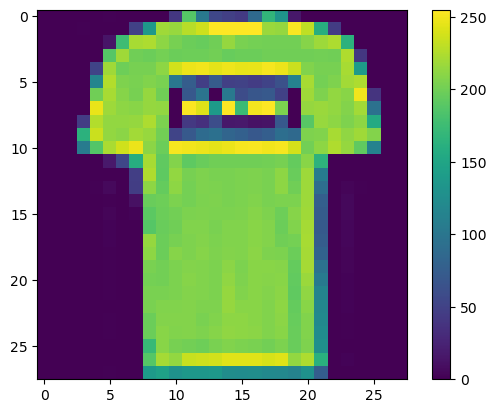

In [70]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

### Task 3:
The data dimension in the clothin data example is 784. Reduce the data dimension by merging four neighboring pixels into one and averaging the corresponding values of pixels so that the dimension of the reduced data is 196. Name the new training images and test images `train_images_red2` and `test_images_red2` respectively. We will continue our analysis using these two new dataset with these specific names. Plot examples of the obtained images. Keep in mind the creating a new data set of the reduced resolution will take some time.

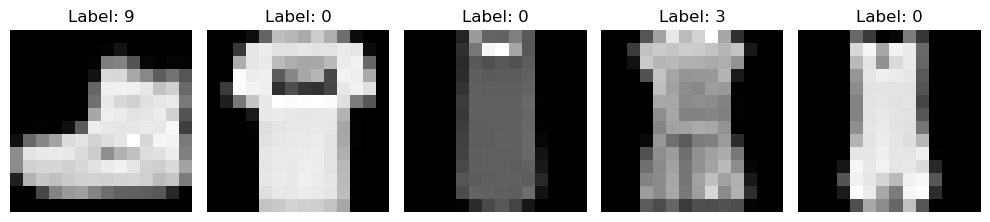

In [71]:
import matplotlib.pyplot as plt


# Function to reduce the image resolution by merging four neighboring pixels into one
def reduce_resolution(images):
    # Reduce both height and width by a factor of 2
    reduced_images = images.reshape(images.shape[0], images.shape[1] // 2, 2, images.shape[2] // 2, 2).mean(axis=(2, 4))
    return reduced_images

# Apply the reduction function to the training and test images
train_images_red2 = reduce_resolution(train_images)
test_images_red2 = reduce_resolution(test_images)

# Plot examples of the obtained images
fig, axes = plt.subplots(1, 5, figsize=(10, 10))
for i, ax in enumerate(axes):
    ax.imshow(train_images_red2[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[i]))
    ax.axis('off')

plt.tight_layout()
plt.show()

### Further description of the data

The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [72]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

There are 60,000 images in the training set and 10,000 images in the test set. Each image is represented as 14 x 14 pixels.

In [73]:
# If the previous task has been completed the following commented code will explore the outcomes. 
print(train_images_red2.shape)
print(test_images_red2.shape)

(60000, 14, 14)
(10000, 14, 14)


Likewise, there are 60,000 labels in the training set and 10,000 labels in the test set:

In [74]:
print(len(train_labels))
print(len(test_labels))

60000
10000


Each label is an integer between 0 and 9:

In [75]:
# You have a concept of a set implemented in Python

set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### Preprocessing the data

An important problem in machine learning is to scale data to make numerical calculations stable. To illustrate the problem let us consider evaluation of the determinant of a certain covariance matrix (please, review the concept of determinant and covariance, if needed).

Actually the chosen covariance matrix is related to our dataset. 

In [76]:
test_vectors_old = test_images_red2.reshape(10000,14*14) #'test_image_red2' was created in Task 3

tshirt_vec_test_old=test_vectors_old[test_labels==0]

tshirt_cov_test_old = np.cov(tshirt_vec_test_old.T)

In [77]:
np.linalg.det(tshirt_cov_test_old) # Use the numpy linear algebra library to find the determinant.

inf

In [78]:
np.linalg.det(tshirt_cov_test_old/10) # Simple scaling fix the problem.

8.373388002292804e+214

In [79]:
np.linalg.det(tshirt_cov_test_old/100)

8.373388002297951e+18

Thus data usually need be preprocessed to avoid numerical problems. For the above problem a scaling into [0,1] is often a remedy. 

In [80]:
max_val = np.max(train_images_red2.flatten())
min_val = np.min(train_images_red2.flatten())
print(max_val)
print(min_val)

255.0
0.0


As we see from above, the pixel values fall in the range of 0 to 255. Scale these values to a range of 0 to 1 before our statistical analysis. It's important that the training set and the testing set be preprocessed in the same way:

In [81]:
train_images_red2 = (train_images_red2 - min_val) / (max_val - min_val) #of course, dividing by 255 leads to the same outcome

test_images_red2 = (test_images_red2 - min_val) / (max_val - min_val)

To verify that the data is in the correct format and that you're ready for the analysis, let's display the first 25 images from the training set and display the class name below each image.

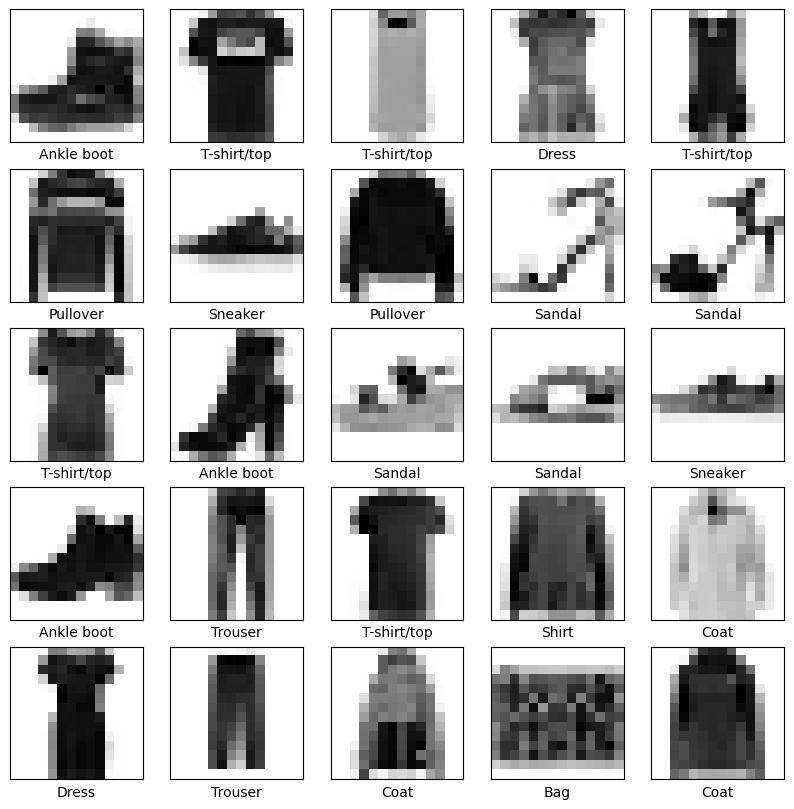

In [82]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_red2[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### The Gaussian likelihood method for classification

After preparing the data we can now turn now to analyzing them. The method we explore today is the Gaussian likelihood method based classification. In this approach, we simply treat the data as high-dimensional vectors disregarding their spatial structure.

We first learn how to reshape and subsample matrices (arrays).

In [83]:
test=train_images_red2[0:10,4:6,4:6]
test

array([[[0.00098039, 0.00196078],
        [0.00098039, 0.00294118]],

       [[0.82941176, 0.16176471],
        [0.80784314, 0.88431373]],

       [[0.18431373, 0.34215686],
        [0.20980392, 0.34215686]],

       [[0.56176471, 0.47745098],
        [0.49803922, 0.49509804]],

       [[0.52156863, 0.83823529],
        [0.48235294, 0.84313725]],

       [[0.45588235, 0.60588235],
        [0.67941176, 0.68823529]],

       [[0.00098039, 0.00098039],
        [0.00098039, 0.00098039]],

       [[0.88039216, 0.89607843],
        [0.89215686, 0.89411765]],

       [[0.00098039, 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.        , 0.        ]]])

In [84]:
test2=test.reshape(10,4) # Reshape to vectors
test2

array([[0.00098039, 0.00196078, 0.00098039, 0.00294118],
       [0.82941176, 0.16176471, 0.80784314, 0.88431373],
       [0.18431373, 0.34215686, 0.20980392, 0.34215686],
       [0.56176471, 0.47745098, 0.49803922, 0.49509804],
       [0.52156863, 0.83823529, 0.48235294, 0.84313725],
       [0.45588235, 0.60588235, 0.67941176, 0.68823529],
       [0.00098039, 0.00098039, 0.00098039, 0.00098039],
       [0.88039216, 0.89607843, 0.89215686, 0.89411765],
       [0.00098039, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [85]:
len(train_labels)
tshirt=train_labels==0
tshirt_images=train_images_red2[tshirt,0:2,0:2]
print(tshirt_images.shape)

(6000, 2, 2)


### Task 4

Reschape the original data to vectors and compute covariances and the means within each of ten classes. Plot the "average" object from each class. Use for your computation only the training data. 

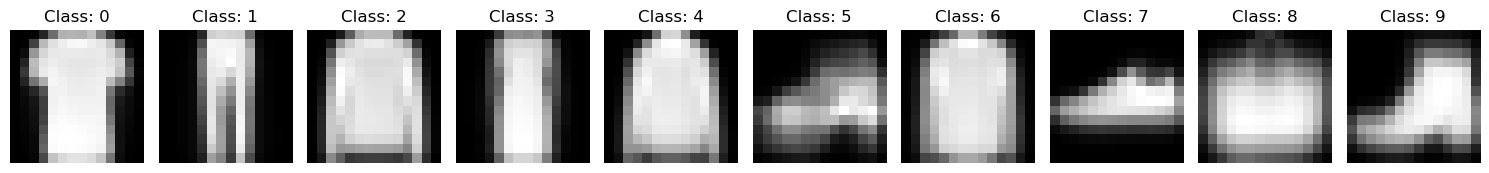

In [86]:
# Constants
num_classes = 10
image_size = 14  # After reduction

# Reshape the training images to vectors
train_images_vectors = train_images_red2.reshape(train_images_red2.shape[0], -1)

# Initialize lists to hold the means and covariances
class_means = []
class_covariances = []

# Compute means and covariances for each class
for i in range(num_classes):
    # Extract images for class i
    class_images = train_images_vectors[train_labels == i]
    
    # Compute the mean vector and covariance matrix for class i
    mean_vector = np.mean(class_images, axis=0)
    covariance_matrix = np.cov(class_images, rowvar=False)
    
    # Append to the lists
    class_means.append(mean_vector)
    class_covariances.append(covariance_matrix)

# Plot the "average" image for each class
fig, axes = plt.subplots(1, num_classes, figsize=(15, 15))
for i in range(num_classes):
    # Reshape the mean vector to the original image size and plot
    mean_image = class_means[i].reshape(image_size, image_size)
    axes[i].imshow(mean_image, cmap='gray')
    axes[i].set_title('Class: {}'.format(i))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Task 5

Utilize the computed means and covariances to write a function that for a given image classifies it into one of the ten classes that is based on the maximum Gaussian likelihood principle. Check how this classifier performs on few selected images. 

As you could see, the certain regions of images could always be blank, which is a source of the singularity in the data. You may use the following function to solve the problem of singularity:

In [43]:
from scipy.stats import multivariate_normal

def preceigval(Sigma):
    sigma2 = np.diag(Sigma)
    d = len(sigma2)
    w, v = np.linalg.eig(Sigma)
    if min(sigma2) <= 1e-10 or min(w) <= 1e-10:  # to protect against singularities
        delta = min(sigma2[sigma2 > 1e-10])
        Sigma = Sigma + delta * np.identity(d)
    return Sigma

def classify_image(image, class_means, class_covariances):
    # Reshape the image into a vector
    image_vector = image.reshape(-1)
    likelihoods = []
    
    for i in range(num_classes):
        # Regularize the covariance matrix
        Sigma = preceigval(class_covariances[i])
        
        # Initialize the multivariate normal distribution for class i
        mvn = multivariate_normal(mean=class_means[i], cov=Sigma, allow_singular=True)
        
        # Compute the likelihood of the image under class i
        likelihood = mvn.pdf(image_vector)
        likelihoods.append(likelihood)
    
    # Return the class with the highest likelihood
    return np.argmax(likelihoods)

# Now check the classifier performance on few selected images
num_test_images = 10
test_images_sample = test_images_red2[:num_test_images]
classified_labels = []

for image in test_images_sample:
    classified_label = classify_image(image, class_means, class_covariances)
    classified_labels.append(classified_label)

# Print out the classified labels for the sample
classified_labels


[7, 2, 1, 1, 2, 1, 4, 4, 7, 7]

### Task 6

Here you should do more thoroughful evaluation of the ML method. Evaluate first how the classifier performs on the training dataset by evaluating the classification accuracy. Then do the same on the testing data set. Note that it may take some time. Compare the results and comment.

In [44]:
def evaluate_accuracy_subset(images, labels, class_means, class_covariances, subset_ratio=0.1):
    # Determine the size of the subset
    subset_size = int(len(images) * subset_ratio)
    
    # Create a random subset of indices
    subset_indices = np.random.choice(len(images), subset_size, replace=False)
    
    # Initialize count of correct predictions
    correct_predictions = 0
    
    # Evaluate accuracy on the subset
    for i in subset_indices:
        predicted_class = classify_image(images[i], class_means, class_covariances)
        if predicted_class == labels[i]:
            correct_predictions += 1
    
    # Calculate accuracy as the percentage of correctly predicted images
    accuracy = correct_predictions / subset_size
    return accuracy

# Evaluate classification accuracy on a 10% subset of the training dataset
train_accuracy_subset = evaluate_accuracy_subset(train_images_red2, train_labels, class_means, class_covariances)

# Evaluate classification accuracy on a 10% subset of the testing dataset
test_accuracy_subset = evaluate_accuracy_subset(test_images_red2, test_labels, class_means, class_covariances)

(train_accuracy_subset, test_accuracy_subset)



(0.6608333333333334, 0.666)

The code performs an evaluation of the accuracy of a Gaussian likelihood-based classifier on two subsets, each representing 10% of the original training and testing datasets of the Fashion MNIST images. The classifier uses precomputed class means and covariance matrices to predict the class of each image based on which class's distribution the image is most likely to come from.

By evaluating on only 10% of the data, the process becomes much faster, providing a quick approximation of the classifier's performance. However, this approach has several drawbacks. Most notably, the reduced sample size may not be representative of the entire dataset, potentially introducing sample bias. The randomness in selecting the subset can affect the reliability and repeatability of the accuracy measurement, meaning different runs may yield different results. This approach might miss out on capturing the full complexity and diversity of the data, possibly overlooking certain patterns or anomalies that could be crucial for understanding the classifier's performance. As such, the obtained accuracy figures of approximately 66% for both training and testing sets should be taken as estimations rather than definitive metrics of performance.